In [3]:
from fastai.imports import *
from fastai.conv_learner import *

In [5]:
PATH=Path('data/seefood')

In [14]:
!mkdir data/seefood/valid

In [26]:
for cat in (PATH/'train').iterdir():
    (PATH/f'valid/{cat.name}').mkdir()
    imgs = list(cat.iterdir())
    for img in imgs[:100]:
        img.rename(f'data/seefood/valid/{cat.name}/{img.name}')

In [30]:
base_model = resnet34

sz=256

bs = 64
tfms = tfms_from_model(base_model, sz)

In [36]:
data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms)

In [72]:
learner = ConvLearner.pretrained(f=base_model, data=data)

In [51]:
learner.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy   
    0      2.118861   1.676197   0.569703  
    1      1.871011   1.556409   0.601089  



[array([1.55641]), 0.6010891088636795]

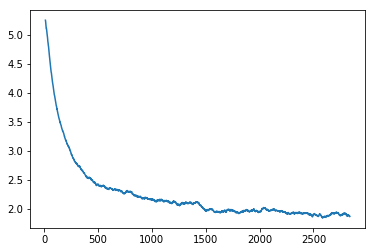

In [71]:
learner.sched.plot_loss()

In [53]:
log_probs = learner.predict()

In [54]:
log_probs.shape

(10100, 101)

In [57]:
probs = np.exp(log_probs)

In [58]:
preds = np.argmax(probs, 1)

In [63]:
data.val_y

array([  0,   0,   0, ..., 100, 100, 100])

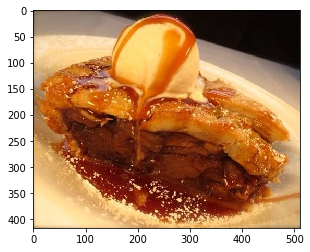

In [70]:
plt.imshow(open_image(PATH/data.val_ds.fnames[np.where(data.val_y != preds)[0][0]]))

In [72]:
learner = ConvLearner.pretrained(f=base_model, data=data)

In [73]:
learner.lr_find()

 83%|████████▎ | 1175/1421 [02:51<00:35,  6.87it/s, loss=10.6]

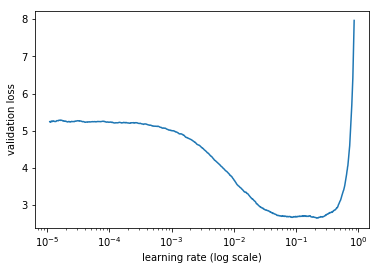

In [75]:
learner.sched.plot()

In [76]:
lr=1e-2

In [77]:
lr

0.01

In [ ]:
data=ImageClassifierData.from

In [78]:
transforms_side_on

In [79]:
tfms = tfms_from_model(base_model, sz, aug_tfms=transforms_side_on)

In [82]:
data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms)

In [83]:
learner.fit(lr, 1, cycle_len=5, use_clr=(10, 10))

epoch      trn_loss   val_loss   accuracy   
    0      2.163285   1.720275   0.562871  
    1      1.94329    1.570257   0.597723  
    2      1.842791   1.506923   0.611782  
    3      1.754681   1.479134   0.618812  
    4      1.729444   1.463499   0.624059  


[array([1.4635]), 0.6240594059641998]

In [ ]:
learner.unfreeze()

In [ ]:
learner.fit(lr, 1, cycle_len=5, use_clr=(10, 10))

epoch      trn_loss   val_loss   accuracy   
    0      2.163285   1.720275   0.562871  
    1      1.94329    1.570257   0.597723  
    2      1.842791   1.506923   0.611782  
    3      1.754681   1.479134   0.618812  
 71%|███████   | 1008/1421 [02:30<01:01,  6.71it/s, loss=1.73]